In [1]:
from har_datasets.dataset.har_dataset import HARDataset
from har_datasets.supported.getter import DatasetId, get_har_dataset_cfg_and_parser

In [2]:
cfg, parse = get_har_dataset_cfg_and_parser(DatasetId.DSADS)
dataset = HARDataset(cfg, parse, override_cache=False)

Creating config hash...
Loading data...
Checking data format...
Resampling data...
Selecting activities...
Selecting channels...
Generating windows...


Saving windows: 100%|██████████| 17784/17784 [00:23<00:00, 752.80it/s]


In [3]:
train_loader, val_loader, test_loader = dataset.get_dataloaders()

subject_id
4    2223
3    2223
2    2223
5    2223
7    2223
8    2223
6    2223
1    2223
Name: count, dtype: int64
activity_id
0     936
10    936
17    936
16    936
15    936
14    936
13    936
12    936
11    936
9     936
1     936
8     936
7     936
6     936
5     936
4     936
3     936
2     936
18    936
Name: count, dtype: int64
train: 8892 | val: 4446 | test: 2223


In [4]:
weights = dataset.get_class_weights(train_loader)
len(weights)

19

In [5]:
dataset.window_index
assert dataset.windows is not None
dataset.windows[0]

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,8.4679,-2.7189,0.94689,0.63928,-0.040385,0.067077,-0.36969,0.55460,-0.35626,7.7281,...,0.52550,-9.7249,1.65280,-2.512700,0.16048,-0.034396,-1.52670,0.53596,0.38984,-0.33420
1,7.8263,-2.7443,1.18060,0.59063,-0.022775,0.023106,-0.37095,0.54494,-0.37025,7.5087,...,0.51576,-9.9137,0.68224,-2.384000,0.10205,0.338980,-1.92910,0.51245,0.42758,-0.32544
2,7.2316,-2.4651,1.10330,0.57405,-0.068264,0.043289,-0.37047,0.53596,-0.38151,7.4780,...,0.51141,-8.8721,0.05867,-0.597960,0.14723,0.223730,-2.12040,0.47948,0.46591,-0.32252
3,7.2692,-2.3546,1.17890,0.57741,-0.097503,0.068966,-0.36970,0.52742,-0.38983,7.4748,...,0.50469,-8.4095,-1.03390,-0.615500,0.48820,0.087542,-1.99930,0.44073,0.50019,-0.33065
4,8.3902,-3.1721,1.43580,0.36718,-0.079948,0.112480,-0.36909,0.52326,-0.39859,8.1673,...,0.50848,-9.3363,-0.18010,-0.046262,0.65940,-0.130230,-1.91030,0.40008,0.52136,-0.34594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,9.2572,-2.2042,2.19470,-0.12848,-0.155150,-0.186850,-0.37877,0.45179,-0.41781,9.0310,...,0.54532,-11.1150,-7.48300,1.786200,0.22850,0.320210,0.19781,0.28132,0.53965,-0.38433
60,10.2260,-2.4625,1.85720,-0.19528,-0.142450,-0.221580,-0.38500,0.45017,-0.41244,8.9269,...,0.54576,-5.1488,-3.62420,-1.142500,0.40414,0.177530,0.53815,0.28858,0.52867,-0.39137
61,10.9050,-2.3047,1.77380,-0.29796,-0.087913,-0.300320,-0.39044,0.45130,-0.40451,9.8879,...,0.54522,-9.1206,-5.39390,-0.250870,0.29141,0.492900,0.50261,0.31089,0.51472,-0.39094
62,11.5040,-3.3167,1.69720,-0.40631,-0.019750,-0.291620,-0.39489,0.45246,-0.39802,11.0650,...,0.54124,-10.0180,-4.23840,-0.546730,0.24079,0.347330,0.74271,0.32732,0.50238,-0.39278


torch.Size([32, 64, 45])


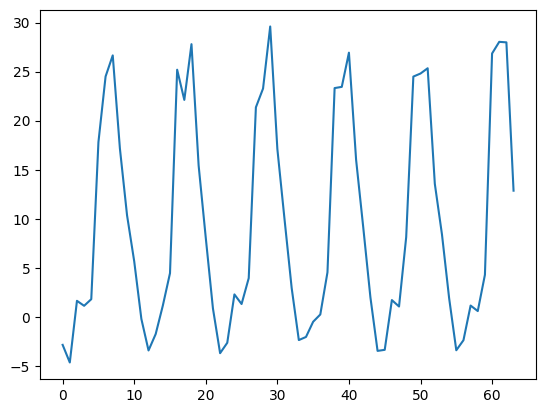

In [82]:
from matplotlib import pyplot as plt

y, x1, x2 = next(iter(train_loader))
print(x1.shape)

plt.plot(x1[0, :, 0])
plt.show()